# Parámetros

In [1]:
ECOBICI_CLIENT_ID = '2199_132ley5lk3404wkk4c4w4ggo48kwcokosogg0k0www84s08gs'
ECOBICI_CLIENT_SECRET = '61xytd2ketssok44g4kkckwogkg048gk0ok48sc0k0wgc8scs'

TELEGRAM_API_KEY = '5424781174:AAGSCoHB5NXzsdRPPRR-9qXQ8VtuLhT8I34'

# Clase

In [2]:
from etl import EcoBiciMap
ebm = EcoBiciMap(ECOBICI_CLIENT_ID, ECOBICI_CLIENT_SECRET, TELEGRAM_API_KEY, is_local=True)
print(ebm)


        30/Jun/2022 14:59
        Clase para extraer información de la API Ecobici (https://www.ecobici.cdmx.gob.mx/sites/default/files/pdf/manual_api_opendata_esp_final.pdf)
        transformar, graficar la disponibilidad en un mapa de calor, exportar los datos y crear un tweet con el mapa.
        


# Tokens de acceso

In [3]:
ebm.get_token(first_time=True)
ebm.ACCESS_TOKEN

'YmFiMjBkZGNmMzI3MTg5NzVkOWFlNmVjZTI0N2RmNzU2MmFjYzBlNzJjOWRiYTFjMTYxZTI3Mzg5YTBlMjI3Nw'

# Extracción

In [4]:
ebm.st = ebm.get_data()
ebm.st.head()

,id,name,address,addressNumber,zipCode,districtCode,districtName,altitude,nearbyStations,stationType,location.lat,location.lon
0,55,55 5 DE MAYO-BOLIVAR,055 - 5 de Mayo - Bolívar,S/N,06700,1,Ampliación Granada,None,"[65, 87]","BIKE,TPV",19.434356,-99.138064
1,124,124 CLAUDIO BERNARD-DR. LICEAGA,124 - Claudio Bernard-Dr. Liceaga,S/N,06500,1,Ampliación Granada,None,"[119, 123, 133]",BIKE,19.422392,-99.150358
2,159,159 HUATABAMPO-EJE 1 PTE. AV. CUAUHTÉMOC,159 - Huatabampo-Eje 1 Pte. Av. Cuauhtémoc,S/N,06760,1,Ampliación Granada,None,"[158, 163]",BIKE,19.407517,-99.155373
3,241,E241 EJERCITO NAL-JUAN VAZQUEZ DE LA MELLA,241 - Ejercito Nacional-Juan Vazquez de la Mella,S/N,11520,1,Ampliación Granada,None,[460],ELECTRIC_BIKE,19.438620,-99.207580
4,243,243 MIGUEL DE CERVANTES SAAVEDRA-LAGO FILT,243 - Miguel de Cervantes Saavedra-Lago Filt,S/N,11510,1,Ampliación Granada,None,"[199, 242, 244]",BIKE,19.440839,-99.196712


In [5]:
ebm.st['zipCode'].value_counts().head()

06500    64
11510    47
06700    39
3104     21
06100    20
Name: zipCode, dtype: int64

In [6]:
ebm.av = ebm.get_data(availability=True)
ebm.av.head()

,id,status,availability.bikes,availability.slots
0,1,OPN,8,13
1,2,OPN,3,18
2,3,CLS,11,24
3,4,OPN,14,1
4,5,OPN,9,2


# Códigos Postales CDMX ([fuente](https://datos.cdmx.gob.mx/dataset/7abff432-81a0-4956-8691-0865e2722423/resource/8ee17d1b-2d65-4f23-873e-fefc9e418977))

<AxesSubplot:>

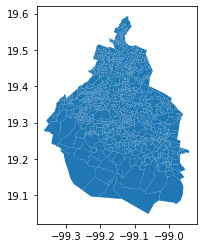

In [7]:
# ebm.get_shapefile()

from geopandas import read_file
ebm.gdf = read_file('/Users/efrain.flores/Desktop/hub/ecobici_bot/data/shp').to_crs(epsg=4326)
ebm.gdf.plot()

# Formato a mapa

In [8]:
# import contextily as cx

# ax = ebm.gdf.plot(figsize=(8, 8), alpha=0.5)
# cx.add_basemap(ax, crs=ebm.gdf.crs)

In [9]:
# ax = ebm.gdf.plot(figsize=(8, 8), alpha=0.1, edgecolor='k')
# cx.add_basemap(ax, crs=ebm.gdf.crs, source=cx.providers.Stamen.TonerLabels, interpolation='sinc', aspect='equal')

# Transformar

In [10]:
ebm.transform(zipcode='06500')
ebm.df.head()

,id,zipCode,location.lat,location.lon,status,availability.bikes,availability.slots,slots_proportion,bikes_proportion
0,124,06500,19.422392,-99.150358,OPN,1,32,0.969697,0.030303
1,91,06500,19.437400,-99.137571,OPN,1,20,0.952381,0.047619
2,92,06500,19.436531,-99.131497,OPN,2,19,0.904762,0.095238
3,93,06500,19.436741,-99.134811,OPN,0,35,1.000000,0.000000
4,95,06500,19.430722,-99.133698,OPN,13,4,0.235294,0.764706


# Mapa presente

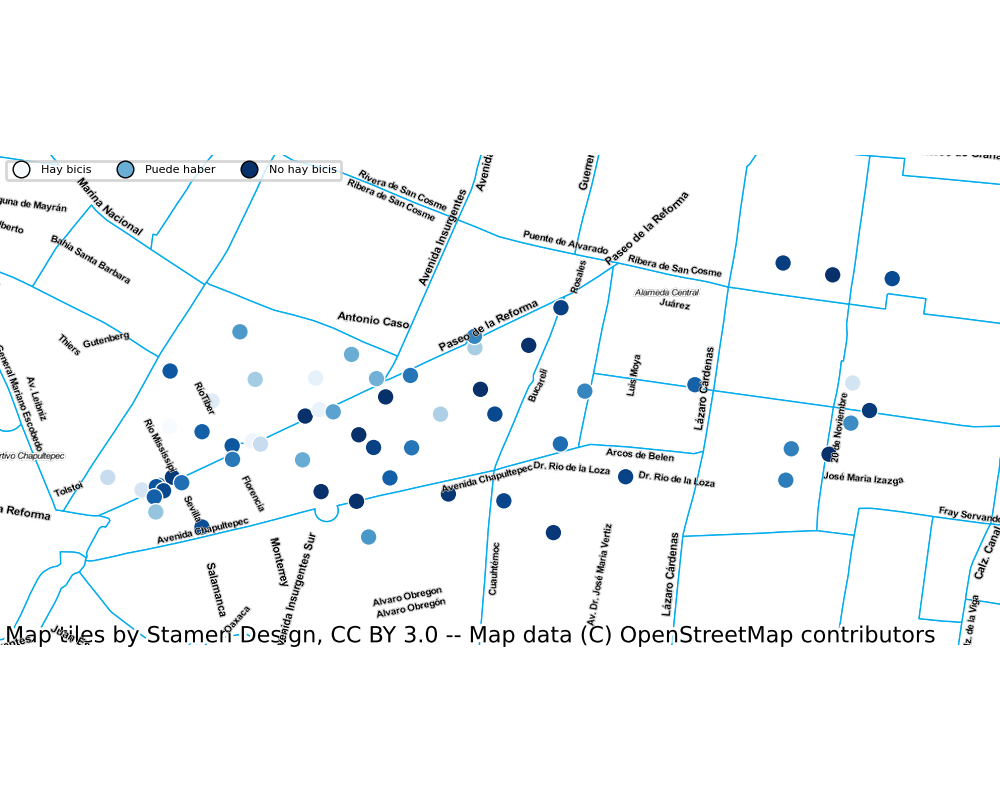

<Figure size 432x288 with 0 Axes>

In [11]:
img = ebm.plot_map(
    data=ebm.df,
    col_to_plot='slots_proportion',
    padding=0.006,
    color='#ffffff',
    edgecolor='#00acee', 
    points_palette='Blues')

img

# Modelo

In [12]:
# ebm.prediction_data(file_name='df_for_map.csv', is_local=True)
# ebm.pred.head()

In [13]:
# ebm.plot_map(data=ebm.pred, col_to_plot='bikes_proportion', img_name='future_map',padding=0.006,
#     # color='#1B1B1B',
#     color='#ffffff',
#     edgecolor='#00acee', 
#     points_palette='Blues')

# ebm.eb_map['future_map']

# Guardar imagen

In [14]:
# ebm.eb_map['future_map'].savefig('/Users/efraflores/Desktop/hub/ecobici_bot/media/map/future_map.png')

# Crear tweet

In [15]:
# ebm.tweet_map(img='/Users/efraflores/Desktop/hub/ecobici_bot/media/map/future_map.png')